In [15]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import platform
import matplotlib as mpl
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels
from patsy import dmatrices

In [16]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [17]:
df=pd.read_csv('incheon_cafe.csv')

In [18]:
df.columns

Index(['지역명', '남_0~9세', '남_10~19세', '남_20~29세', '남_30~39세', '남_40~49세',
       '남_50~59세', '남_60~69세', '남_70~79세', '남_80~89세', '남_90~99세', '남_100세 이상',
       '여_0~9세', '여_10~19세', '여_20~29세', '여_30~39세', '여_40~49세', '여_50~59세',
       '여_60~69세', '여_70~79세', '여_80~89세', '여_90~99세', '여_100세 이상', '군/구',
       '면적', '외식업장개수', '버스정류장', '지하철역수', '주거상업', '주거지역', '기타지역', '상업지역',
       '주거공업', '공업 중심지역', '오피스', '커피전문점', '전체업종', '비율', '시장규모(만원)', '점포당 매출액',
       '인테리어가 멋져요', '커피가 맛있어요', '친절해요', '디저트가 맛있어요', '대화하기 좋아요', '매장이 청결해요',
       '음료가 맛있어요', '특별한 메뉴가 있어요', '빵이 맛있어요', '반려동물과 가기 좋아요', '음식이 맛있어요',
       '메뉴 구성이 알차요', '건강한 맛이에요', '뷰가 좋아요', '아늑해요', '가성비가 좋아요', '화장실이 깨끗해요',
       '양이 많아요', '컨셉이 독특해요', '사진이 잘 나와요', '매장이 넓어요', '좌석이 편해요', '야외 공간이 멋져요',
       '주차하기 편해요', '종류가 다양해요', '아이와 가기 좋아요', '읽을만한 책이 많아요', '집중하기 좋아요',
       '음악이 좋아요', '차가 맛있어요', '재료가 신선해요', '룸이 잘 되어있어요', '혼밥하기 좋아요',
       '비싼 만큼 가치있어요', '술이 다양해요', '차분한 분위기에요', '혼술하기 좋아요', '오래 머무르기 좋아요',
       '선물하기 좋아요', '주문제작을 잘해

In [19]:
df.fillna(0,inplace=True)
df.drop(axis=1,columns='지역명',inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['군/구']=le.fit_transform(df['군/구'])

In [21]:
keward=['인테리어가 멋져요',
       '커피가 맛있어요', '친절해요', '디저트가 맛있어요', '대화하기 좋아요', '매장이 청결해요', '음료가 맛있어요',
       '특별한 메뉴가 있어요', '빵이 맛있어요', '반려동물과 가기 좋아요', '음식이 맛있어요', '메뉴 구성이 알차요',
       '건강한 맛이에요', '뷰가 좋아요', '아늑해요', '가성비가 좋아요', '화장실이 깨끗해요', '양이 많아요',
       '컨셉이 독특해요', '사진이 잘 나와요', '매장이 넓어요', '좌석이 편해요', '야외 공간이 멋져요', '주차하기 편해요',
       '종류가 다양해요', '아이와 가기 좋아요', '읽을만한 책이 많아요', '집중하기 좋아요', '음악이 좋아요',
       '차가 맛있어요', '재료가 신선해요', '룸이 잘 되어있어요', '혼밥하기 좋아요', '비싼 만큼 가치있어요',
       '술이 다양해요', '차분한 분위기에요', '혼술하기 좋아요', '오래 머무르기 좋아요', '선물하기 좋아요',
       '주문제작을 잘해줘요', '포장이 깔끔해요', '요금제가 잘 되어있어요', '단체모임 하기 좋아요', '특별한 날 가기 좋아요',
       '음식이 빨리 나와요']

In [22]:
main_col=['인테리어가 멋져요','커피가 맛있어요' '디저트가 맛있어요','음료가 맛있어요', '빵이 맛있어요','음식이 맛있어요']
drop_col = [col for col in keward if col not in main_col]
df.drop(axis=1,columns=drop_col,inplace=True)

In [23]:
drop_col

['커피가 맛있어요',
 '친절해요',
 '디저트가 맛있어요',
 '대화하기 좋아요',
 '매장이 청결해요',
 '특별한 메뉴가 있어요',
 '반려동물과 가기 좋아요',
 '메뉴 구성이 알차요',
 '건강한 맛이에요',
 '뷰가 좋아요',
 '아늑해요',
 '가성비가 좋아요',
 '화장실이 깨끗해요',
 '양이 많아요',
 '컨셉이 독특해요',
 '사진이 잘 나와요',
 '매장이 넓어요',
 '좌석이 편해요',
 '야외 공간이 멋져요',
 '주차하기 편해요',
 '종류가 다양해요',
 '아이와 가기 좋아요',
 '읽을만한 책이 많아요',
 '집중하기 좋아요',
 '음악이 좋아요',
 '차가 맛있어요',
 '재료가 신선해요',
 '룸이 잘 되어있어요',
 '혼밥하기 좋아요',
 '비싼 만큼 가치있어요',
 '술이 다양해요',
 '차분한 분위기에요',
 '혼술하기 좋아요',
 '오래 머무르기 좋아요',
 '선물하기 좋아요',
 '주문제작을 잘해줘요',
 '포장이 깔끔해요',
 '요금제가 잘 되어있어요',
 '단체모임 하기 좋아요',
 '특별한 날 가기 좋아요',
 '음식이 빨리 나와요']

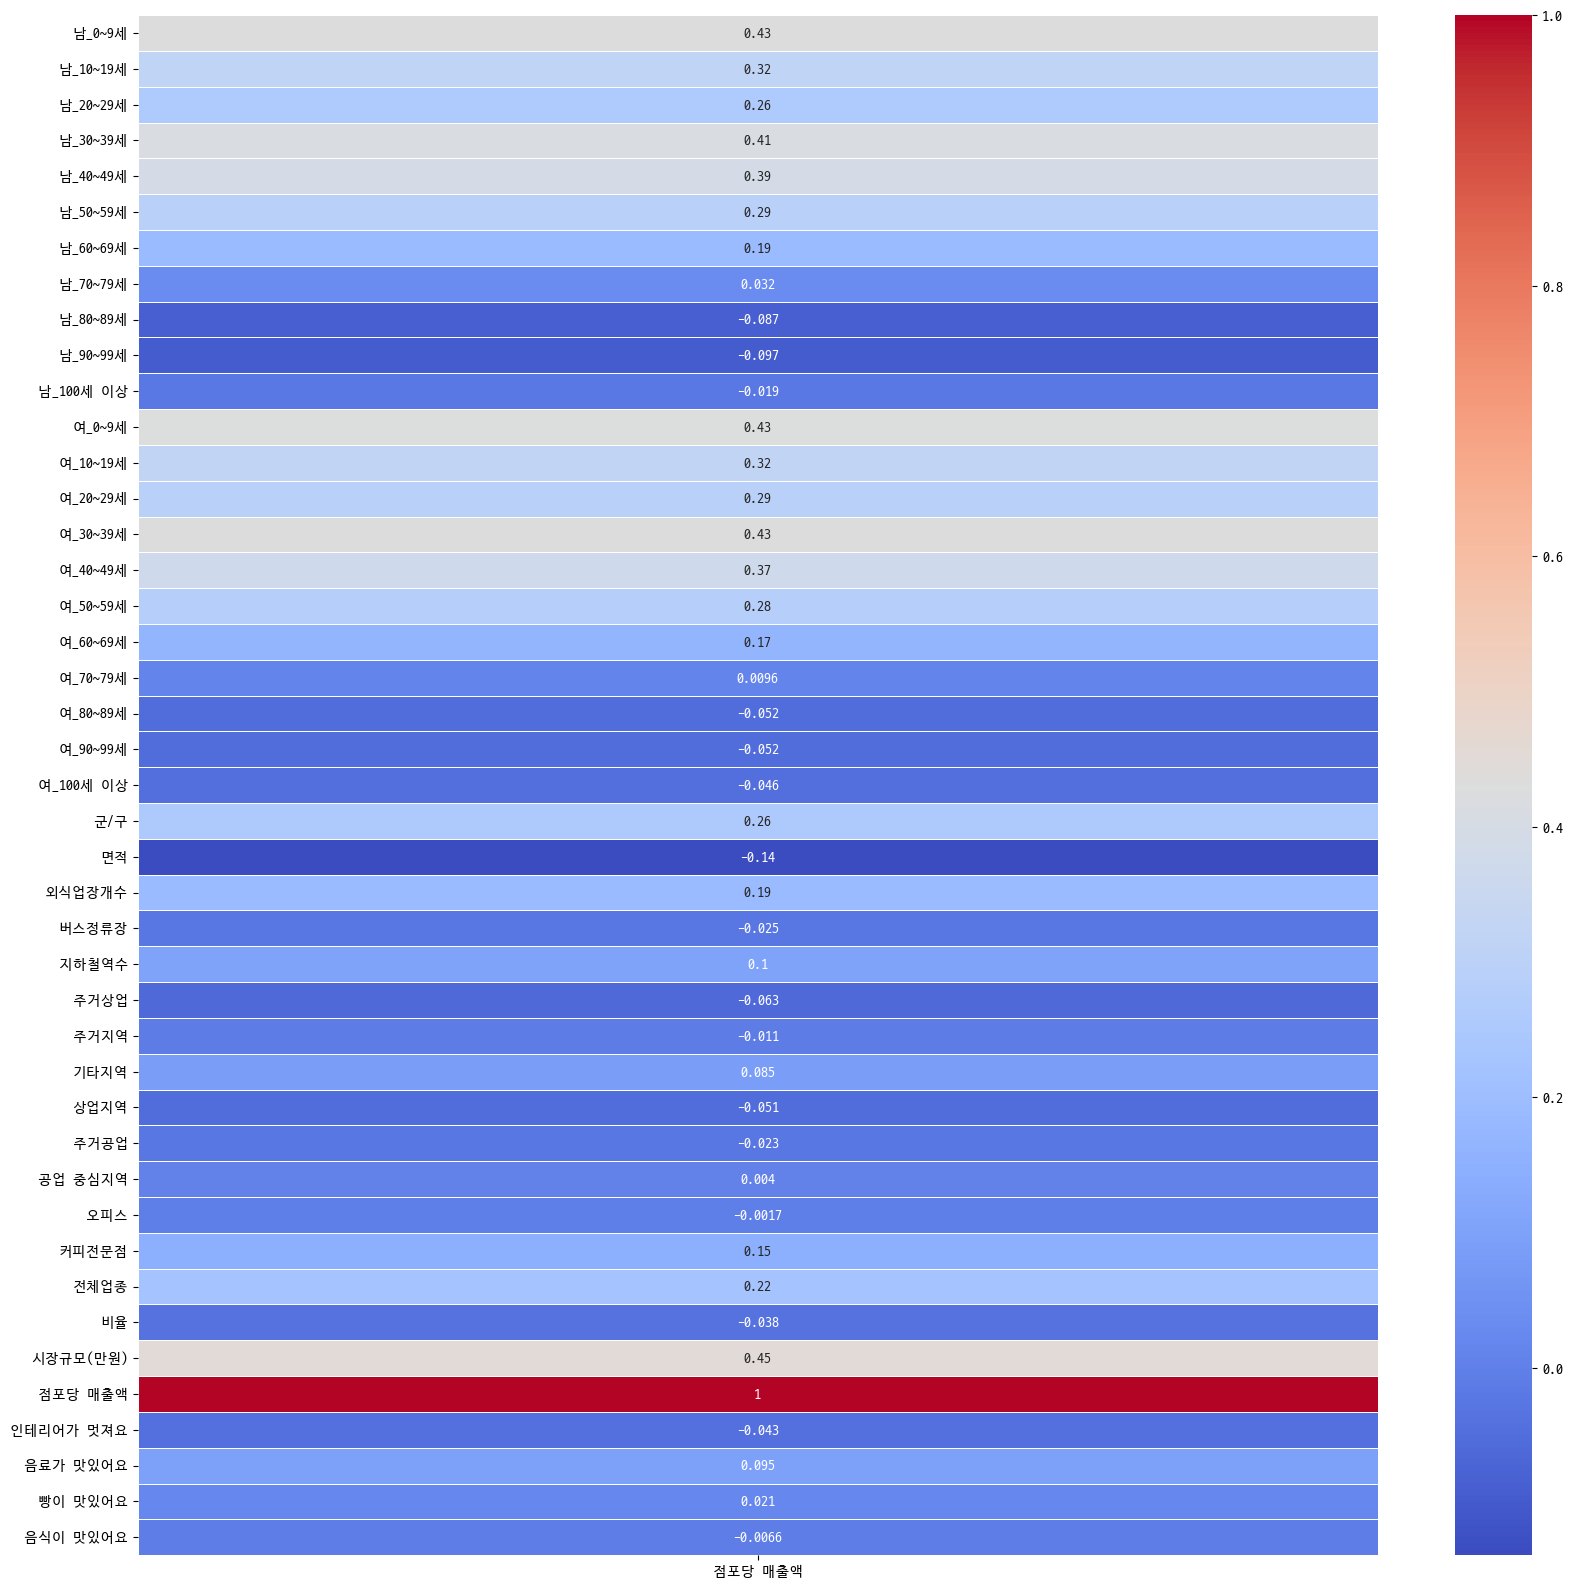

In [24]:
correlation_sales = df.corr()['점포당 매출액'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.show()

In [25]:
df.columns

Index(['남_0~9세', '남_10~19세', '남_20~29세', '남_30~39세', '남_40~49세', '남_50~59세',
       '남_60~69세', '남_70~79세', '남_80~89세', '남_90~99세', '남_100세 이상', '여_0~9세',
       '여_10~19세', '여_20~29세', '여_30~39세', '여_40~49세', '여_50~59세', '여_60~69세',
       '여_70~79세', '여_80~89세', '여_90~99세', '여_100세 이상', '군/구', '면적', '외식업장개수',
       '버스정류장', '지하철역수', '주거상업', '주거지역', '기타지역', '상업지역', '주거공업', '공업 중심지역',
       '오피스', '커피전문점', '전체업종', '비율', '시장규모(만원)', '점포당 매출액', '인테리어가 멋져요',
       '음료가 맛있어요', '빵이 맛있어요', '음식이 맛있어요'],
      dtype='object')

In [26]:
scale_col=['면적', '외식업장개수',
       '버스정류장', '지하철역수','오피스', '커피전문점', '전체업종', '시장규모(만원)']

In [27]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df[scale_col]=ss.fit_transform(df[scale_col])

In [28]:
import statsmodels.api as sm
from patsy import dmatrices

# 변수 이름 수정
df.columns = df.columns.str.replace(' ', '_').str.replace('~', '_').str.replace('/', '')
# 회귀 분석을 위한 디자인 매트릭스 생성
formula = '점포당_매출액 ~ ' + ' + '.join(df.columns[1:])  # 첫 번째 열은 제외
formula = formula.replace('시장규모(만원)', '시장규모_만원')  # 변수 이름 수정

y, X = dmatrices(formula, data=df, return_type="dataframe")

# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 결과 출력
print(results.summary())


PatsyError: Error evaluating factor: NameError: name '시장규모_만원' is not defined
    점포당_매출액 ~ 남_10_19세 + 남_20_29세 + 남_30_39세 + 남_40_49세 + 남_50_59세 + 남_60_69세 + 남_70_79세 + 남_80_89세 + 남_90_99세 + 남_100세_이상 + 여_0_9세 + 여_10_19세 + 여_20_29세 + 여_30_39세 + 여_40_49세 + 여_50_59세 + 여_60_69세 + 여_70_79세 + 여_80_89세 + 여_90_99세 + 여_100세_이상 + 군구 + 면적 + 외식업장개수 + 버스정류장 + 지하철역수 + 주거상업 + 주거지역 + 기타지역 + 상업지역 + 주거공업 + 공업_중심지역 + 오피스 + 커피전문점 + 전체업종 + 비율 + 시장규모_만원 + 점포당_매출액 + 인테리어가_멋져요 + 음료가_맛있어요 + 빵이_맛있어요 + 음식이_맛있어요
                                                                                                                                                                                                                                                                                                                                                               ^^^^^^^